Data Preparation
Goal: Prepare the data you’ll use for portfolio analysis.

Load price data (e.g., from Yahoo Finance or CSVs).

Clean and align timestamps, remove NaNs, and compute daily returns.

Optionally: add market-cap weights if available.



In [198]:
from statistics import covariance

import yfinance as yf
from debugpy.launcher.debuggee import describe
from plotly.express.trendline_functions import rolling

In [199]:
from datetime import date

start = date(2020, 1, 1)
end = date.today()

In [200]:
tickers = ["AAPL", "MSFT", "GOOG", "META"]
stocks = yf.download(tickers, start=start, end=end, auto_adjust=False)
stocks = stocks[["Close"]]
stocks

[*********************100%***********************]  4 of 4 completed


Price            Close                                    
Ticker            AAPL        GOOG        META        MSFT
Date                                                      
2020-01-02   75.087502   68.368500  209.779999  160.619995
2020-01-03   74.357498   68.032997  208.669998  158.619995
2020-01-06   74.949997   69.710503  212.600006  159.029999
2020-01-07   74.597504   69.667000  213.059998  157.580002
2020-01-08   75.797501   70.216003  215.220001  160.089996
...                ...         ...         ...         ...
2025-11-10  269.429993  290.589996  631.760010  506.000000
2025-11-11  275.250000  291.739990  627.080017  508.679993
2025-11-12  273.470001  287.429993  609.010010  511.140015
2025-11-13  272.950012  279.119995  609.890015  503.290009
2025-11-14  272.410004  276.980011  609.460022  510.179993

[1477 rows x 4 columns]

<Axes: title={'center': 'Stock Prices over the last five years'}, xlabel='Date'>

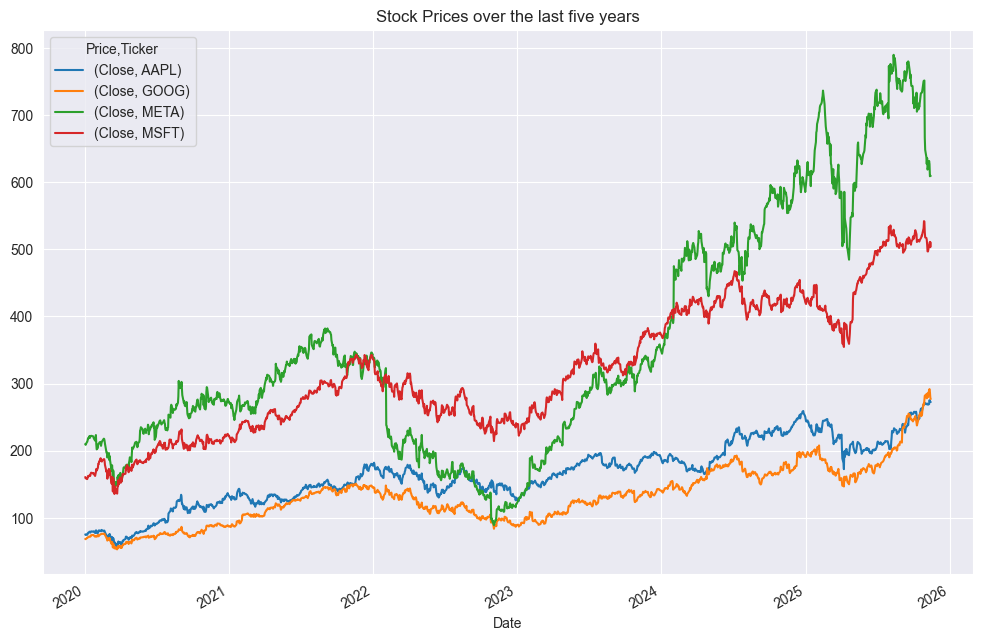

In [201]:
stocks.plot(title = "Stock Prices over the last five years", figsize = (12, 8))

In [202]:
import numpy as np

In [203]:
log_returns = np.log(stocks/stocks.shift(1))
log_returns = log_returns.dropna()
log_returns

Price          Close                              
Ticker          AAPL      GOOG      META      MSFT
Date                                              
2020-01-03 -0.009770 -0.004919 -0.005305 -0.012530
2020-01-06  0.007937  0.024358  0.018658  0.002581
2020-01-07 -0.004714 -0.000624  0.002161 -0.009160
2020-01-08  0.015958  0.007850  0.010087  0.015803
2020-01-09  0.021018  0.010984  0.014210  0.012416
...              ...       ...       ...       ...
2025-11-10  0.003569  0.038196  0.016036  0.018309
2025-11-11  0.021371  0.003950 -0.007435  0.005282
2025-11-12 -0.006488 -0.014884 -0.029239  0.004824
2025-11-13 -0.001903 -0.029338  0.001444 -0.015477
2025-11-14 -0.001980 -0.007696 -0.000705  0.013597

[1476 rows x 4 columns]

In [204]:
lin_returns = stocks / stocks.shift(1) - 1
lin_returns = lin_returns.dropna()
lin_returns

Price          Close                              
Ticker          AAPL      GOOG      META      MSFT
Date                                              
2020-01-03 -0.009722 -0.004907 -0.005291 -0.012452
2020-01-06  0.007968  0.024657  0.018834  0.002585
2020-01-07 -0.004703 -0.000624  0.002164 -0.009118
2020-01-08  0.016086  0.007880  0.010138  0.015928
2020-01-09  0.021241  0.011044  0.014311  0.012493
...              ...       ...       ...       ...
2025-11-10  0.003576  0.038935  0.016165  0.018478
2025-11-11  0.021601  0.003957 -0.007408  0.005296
2025-11-12 -0.006467 -0.014773 -0.028816  0.004836
2025-11-13 -0.001901 -0.028911  0.001445 -0.015358
2025-11-14 -0.001978 -0.007667 -0.000705  0.013690

[1476 rows x 4 columns]

Portfolio Construction
Goal: Build different portfolio types.

Equal-weighted portfolio: assign the same weight to each stock.

Market-cap weighted portfolio: assign weights proportional to each stock’s market capitalization.

Compute daily portfolio returns by multiplying asset returns by weights.

In [205]:
equal_weights = 1/len(tickers)

In [206]:
import pandas as pd

In [207]:
portfolio_returns_equal_weights = (lin_returns * equal_weights).sum(axis=1)
portfolio_returns_equal_weights = pd.DataFrame(portfolio_returns_equal_weights, columns = ["Equally-weighted Portfolio Returns"])
portfolio_returns_equal_weights

,Equally-weighted Portfolio Returns
Date,
2020-01-03,-0.008093
2020-01-06,0.013511
2020-01-07,-0.003070
2020-01-08,0.012508
2020-01-09,0.014772
...,...
2025-11-10,0.019288
2025-11-11,0.005862
2025-11-12,-0.011305


<Axes: title={'center': 'Equally-weighted Portfolio Returns'}, xlabel='Date'>

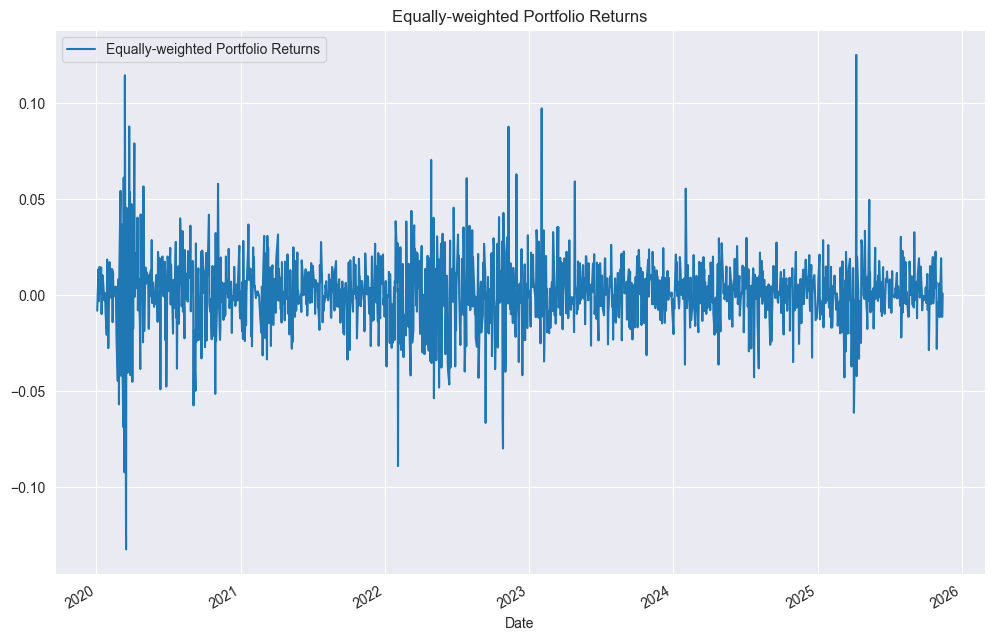

In [208]:
portfolio_returns_equal_weights.plot(title = "Equally-weighted Portfolio Returns", figsize = (12, 8))

In [209]:
import pandas as pd
import numpy as np

marketCap = []
for i in tickers:
    cap = yf.Ticker(i).info["marketCap"]
    marketCap.append(cap)
marketCap = pd.DataFrame(marketCap, index=tickers, columns=["Market Caps"])
marketCap

,Market Caps
AAPL,4033205501952
MSFT,3791850569728
GOOG,3364478255104
META,1537244659712


In [210]:
marketCap_weights = marketCap/marketCap.sum()
print(marketCap_weights)

      Market Caps
AAPL     0.316907
MSFT     0.297943
GOOG     0.264362
META     0.120788


In [211]:
portfolio_returns_marketCap_weights = (lin_returns.droplevel(0, axis=1) @ marketCap_weights).sum(axis=1)
portfolio_returns_marketCap_weights= pd.DataFrame(portfolio_returns_marketCap_weights, columns = ["Market-weighted Portfolio Returns"])
portfolio_returns_marketCap_weights

,Market-weighted Portfolio Returns
Date,
2020-01-03,-0.008727
2020-01-06,0.012089
2020-01-07,-0.004111
2020-01-08,0.013151
2020-01-09,0.015102
...,...
2025-11-10,0.018884
2025-11-11,0.008575
2025-11-12,-0.007995


<Axes: title={'center': 'Market-weighted Portfolio Returns'}, xlabel='Date'>

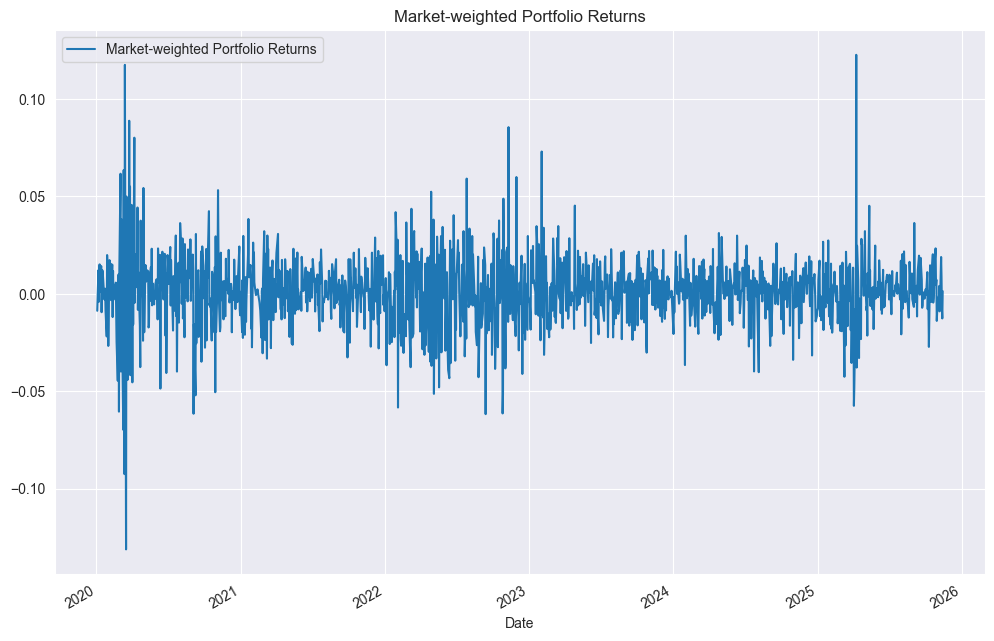

In [212]:
portfolio_returns_marketCap_weights.plot(title = "Market-weighted Portfolio Returns", figsize = (12, 8))

<Axes: title={'center': 'Weighted Portfolio Returns'}, xlabel='Date'>

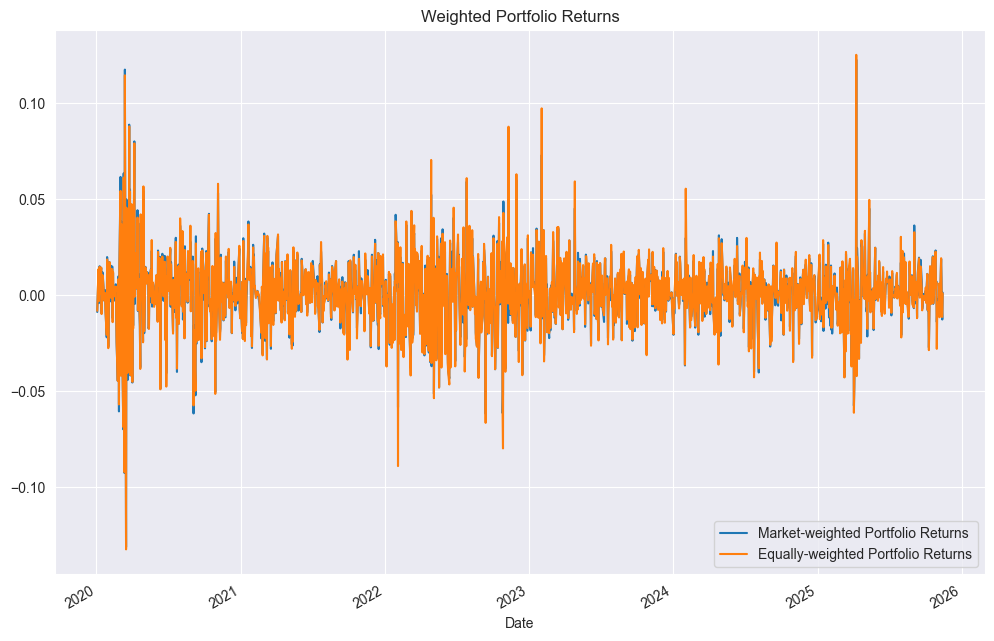

In [213]:
combined = pd.concat([portfolio_returns_marketCap_weights,portfolio_returns_equal_weights], axis=1)
combined.plot(title = "Weighted Portfolio Returns", figsize = (12, 8))

Performance Metrics
Goal: Measure risk and return.

Compute annualized return and annualized volatility.

Calculate Sharpe ratio (return per unit of risk).

Calculate Sortino ratio (return per unit of downside risk).

Compute maximum drawdown and plot cumulative returns.



In [214]:
y_avg_return = pd.DataFrame( index = ["Average Yearly Returns"] )
for i in log_returns:
    y_avg_return[i] = np.mean(log_returns[i])*250
y_avg_return

,"(Close, AAPL)","(Close, GOOG)","(Close, META)","(Close, MSFT)"
Average Yearly Returns,0.218268,0.236964,0.180643,0.195752


In [215]:
mu_y=(log_returns.mean()*250).to_frame().T
sigma_y = (log_returns.std()*np.sqrt(250)).to_frame().T
y_stats = pd.concat([mu_y,sigma_y])
y_stats.index = ["Average Yearly Returns", "Yearly Volatility"]
y_stats

Price                      Close                              
Ticker                      AAPL      GOOG      META      MSFT
Average Yearly Returns  0.218268  0.236964  0.180643  0.195752
Yearly Volatility       0.318791  0.322321  0.443721  0.296050

In [216]:
sharpe_ratio  = (y_stats.loc["Average Yearly Returns"]/y_stats.loc["Yearly Volatility"]).to_frame().T
sharpe_ratio.index = ["Sharpe Ratio"]
y_stats = pd.concat([y_stats,sharpe_ratio])
y_stats

Price                      Close                              
Ticker                      AAPL      GOOG      META      MSFT
Average Yearly Returns  0.218268  0.236964  0.180643  0.195752
Yearly Volatility       0.318791  0.322321  0.443721  0.296050
Sharpe Ratio            0.684673  0.735178  0.407109  0.661215

In [217]:
negative_returns = log_returns[log_returns<0]
downside_vol = (negative_returns.std()*np.sqrt(250)).to_frame().T
downside_vol.index = ["Downside Volatility"]
y_stats = pd.concat([y_stats,downside_vol], axis=0)
y_stats


Price                      Close                              
Ticker                      AAPL      GOOG      META      MSFT
Average Yearly Returns  0.218268  0.236964  0.180643  0.195752
Yearly Volatility       0.318791  0.322321  0.443721  0.296050
Sharpe Ratio            0.684673  0.735178  0.407109  0.661215
Downside Volatility     0.233592  0.236752  0.363490  0.218955

In [218]:
sortino_vol = (y_stats.loc["Average Yearly Returns"]/y_stats.loc["Downside Volatility"]).to_frame().T
sortino_vol.index = ["Sortino Ratio"]
y_stats = pd.concat([y_stats,sortino_vol], axis=0)
y_stats

Price                      Close                              
Ticker                      AAPL      GOOG      META      MSFT
Average Yearly Returns  0.218268  0.236964  0.180643  0.195752
Yearly Volatility       0.318791  0.322321  0.443721  0.296050
Sharpe Ratio            0.684673  0.735178  0.407109  0.661215
Downside Volatility     0.233592  0.236752  0.363490  0.218955
Sortino Ratio           0.934400  1.000892  0.496967  0.894031

<Axes: title={'center': 'Cumulative Returns'}, xlabel='Date'>

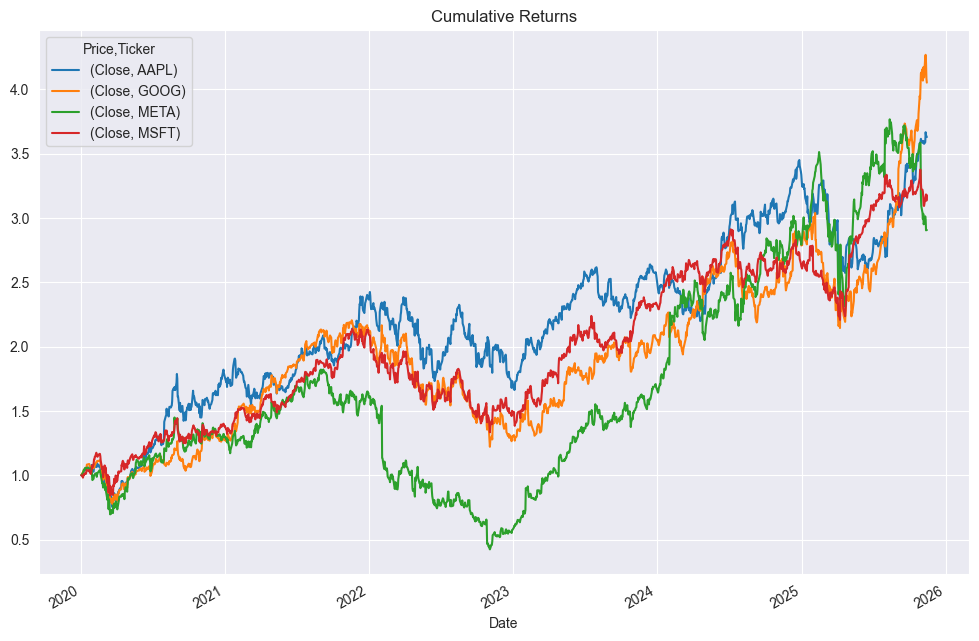

In [219]:
cumulative_returns = (1 + lin_returns).cumprod()
cumulative_returns.iloc[0] = 1
cumulative_returns.plot(title = "Cumulative Returns", figsize = (12, 8))

<Axes: title={'center': 'Max Drowdown'}, xlabel='Date'>

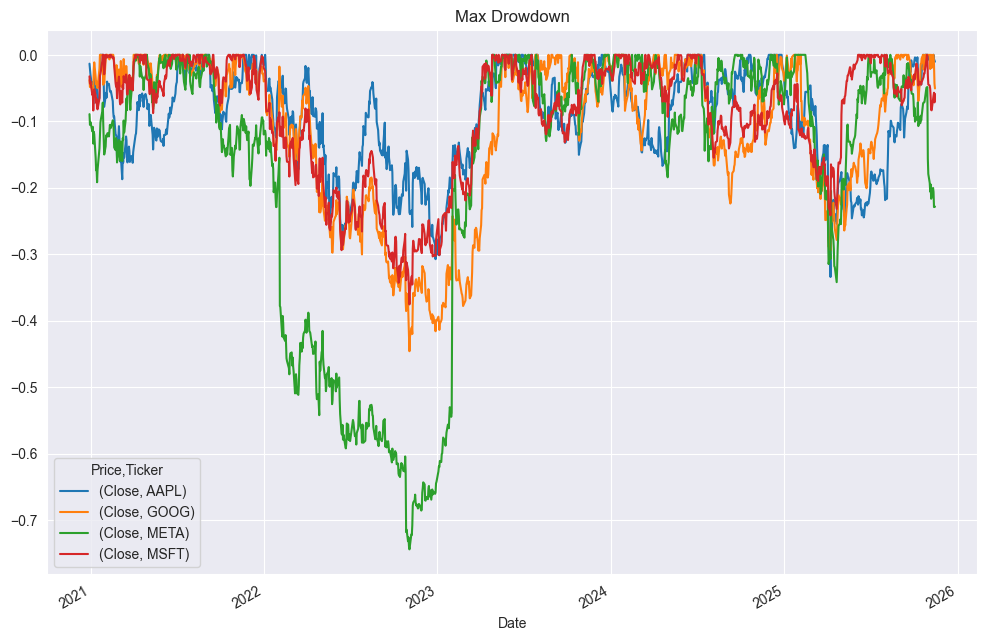

In [220]:
rolling_max = cumulative_returns.rolling(window=250).max()
max_drowdown = cumulative_returns/rolling_max - 1
max_drowdown.plot(title = "Max Drowdown", figsize = (12, 8))

<Axes: title={'center': 'Cumulative Returns of the Market Cap-Weighted Portfolio'}, xlabel='Date'>

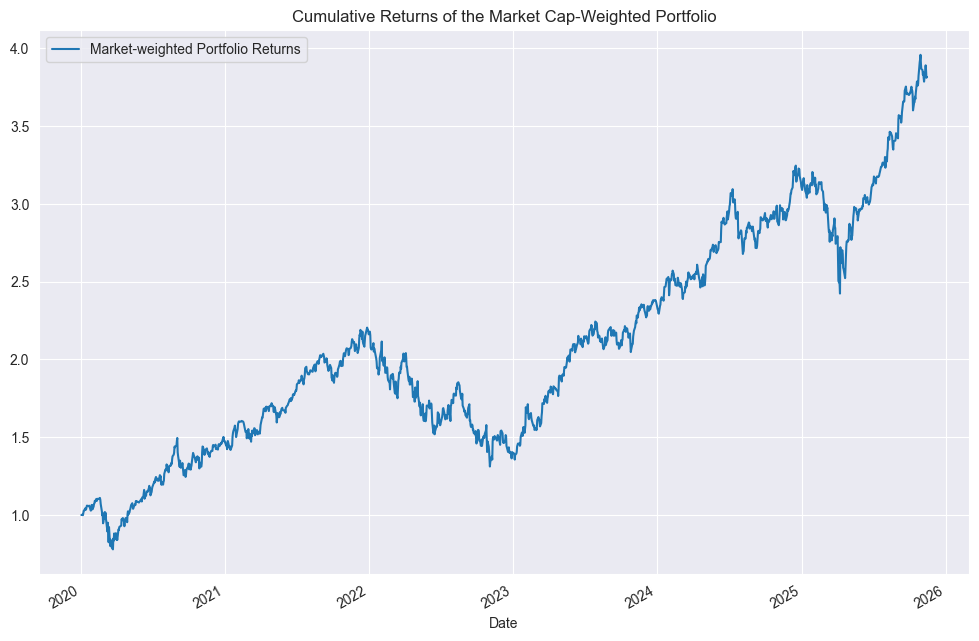

In [221]:
cumulative_returns_market_weighted_portfolio = (1 + portfolio_returns_marketCap_weights).cumprod()
cumulative_returns_market_weighted_portfolio.iloc[0] = 1
cumulative_returns_market_weighted_portfolio.plot(title = "Cumulative Returns of the Market Cap-Weighted Portfolio", figsize = (12, 8))

<Axes: title={'center': 'Max Drowdown of the Portfolio weighted by Market Cap'}, xlabel='Date'>

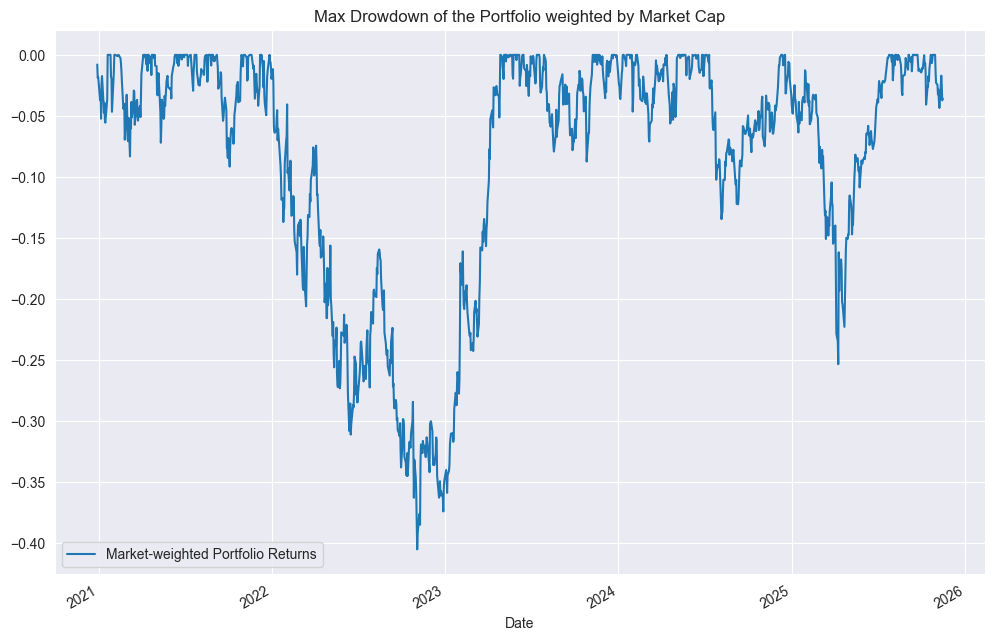

In [222]:
rolling_max_market_weighted_portfolio = cumulative_returns_market_weighted_portfolio.rolling(window=250).max()
max_drowdown_market_weighted_portfolio = cumulative_returns_market_weighted_portfolio/rolling_max_market_weighted_portfolio - 1
max_drowdown_market_weighted_portfolio.plot(title = "Max Drowdown of the Portfolio weighted by Market Cap", figsize = (12, 8))

Risk Metrics
Goal: Assess tail risk and loss potential.

Implement historical Value at Risk (VaR) at chosen confidence levels (e.g., 95%, 99%).

Compute Conditional VaR (CVaR) — the expected loss beyond VaR.

Compare historical vs parametric (normal assumption) VaR estimates.

In [223]:
x = (portfolio_returns_marketCap_weights - portfolio_returns_marketCap_weights.mean()) / portfolio_returns_marketCap_weights.std()

In [224]:
x.describe()

,Market-weighted Portfolio Returns
count,1.476000e+03
mean,-1.805241e-17
std,1.000000e+00
min,-7.409101e+00
25%,-4.621576e-01
50%,1.467546e-02
75%,5.243574e-01
max,6.811607e+00


In [225]:
min_x = min(x)
max_x = max(x)

In [226]:
print(min_x, type(min_x))
print(max_x, type(max_x))

Market-weighted Portfolio Returns <class 'str'>
Market-weighted Portfolio Returns <class 'str'>


In [227]:
min_x = float(np.nanmin(x.to_numpy()))
max_x = float(np.nanmax(x.to_numpy()))
# or, if x is a DataFrame instead of a Series:
# min_x = float(x.min().min()); max_x = float(x.max().max())

In [228]:
empirical_support = np.linspace(min_x, max_x, 100)
empirical_support

array([-7.40910114, -7.26545763, -7.12181411, -6.9781706 , -6.83452708,
       -6.69088357, -6.54724005, -6.40359653, -6.25995302, -6.1163095 ,
       -5.97266599, -5.82902247, -5.68537896, -5.54173544, -5.39809192,
       -5.25444841, -5.11080489, -4.96716138, -4.82351786, -4.67987435,
       -4.53623083, -4.39258732, -4.2489438 , -4.10530028, -3.96165677,
       -3.81801325, -3.67436974, -3.53072622, -3.38708271, -3.24343919,
       -3.09979567, -2.95615216, -2.81250864, -2.66886513, -2.52522161,
       -2.3815781 , -2.23793458, -2.09429107, -1.95064755, -1.80700403,
       -1.66336052, -1.519717  , -1.37607349, -1.23242997, -1.08878646,
       -0.94514294, -0.80149943, -0.65785591, -0.51421239, -0.37056888,
       -0.22692536, -0.08328185,  0.06036167,  0.20400518,  0.3476487 ,
        0.49129222,  0.63493573,  0.77857925,  0.92222276,  1.06586628,
        1.20950979,  1.35315331,  1.49679682,  1.64044034,  1.78408386,
        1.92772737,  2.07137089,  2.2150144 ,  2.35865792,  2.50

In [229]:
from scipy.stats import norm

In [230]:
def F_hat_fct(portfolio, cutoff):
    return np.sum(portfolio<=cutoff)/len(portfolio)

In [231]:
Phi_vals = np.zeros(len(empirical_support))
F_hat_vals = np.zeros(len(empirical_support))

for i in range(len(empirical_support)):
    Phi_vals[i] = norm.cdf(empirical_support[i])
    F_hat_vals[i] = F_hat_fct(x, empirical_support[i])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/var/folders/dn/4wqw68cj32z10qplr1wpk7gc0000gn/T/ipykernel_31916/1932526840.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  F_hat_vals[i] = F_hat_fct(x, empirical_support[i])


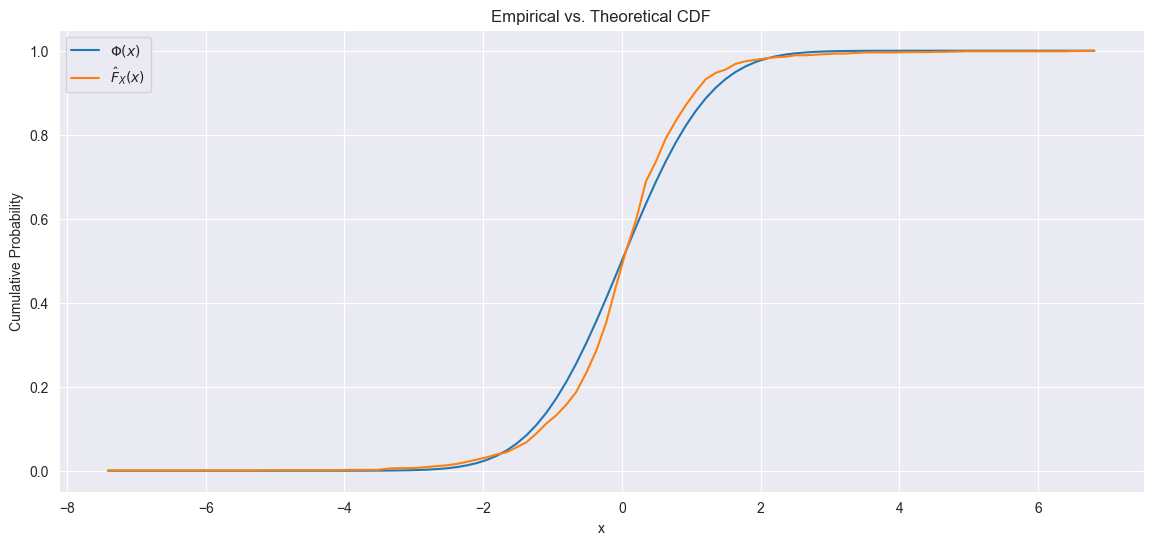

In [232]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.grid(True)

plt.plot(empirical_support, Phi_vals, label=r"$\Phi(x)$")
plt.plot(empirical_support, F_hat_vals, label=r"$\hat{F}_X(x)$")

plt.ylabel("Cumulative Probability")
plt.title("Empirical vs. Theoretical CDF")
plt.legend()
plt.xlabel("x")
plt.show()

In [233]:
epsilon = (empirical_support[1] - empirical_support[0])/2

phi_vals = np.zeros( len(empirical_support) )
f_hat_vals = np.zeros( len(empirical_support) )

for i in range(len(empirical_support)):
  phi_vals[i] = norm.pdf(empirical_support[i])
  f_hat_vals[i] = (F_hat_fct(x, empirical_support[i]+epsilon)-F_hat_fct(x, empirical_support[i]-epsilon) )/(2*epsilon)

/var/folders/dn/4wqw68cj32z10qplr1wpk7gc0000gn/T/ipykernel_31916/1846613767.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  f_hat_vals[i] = (F_hat_fct(x, empirical_support[i]+epsilon)-F_hat_fct(x, empirical_support[i]-epsilon) )/(2*epsilon)


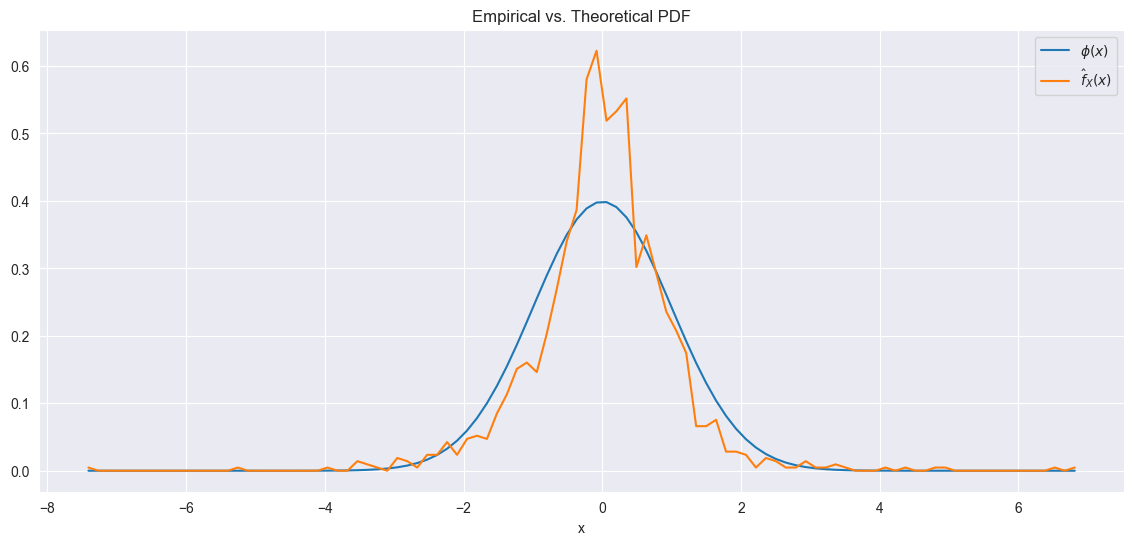

In [234]:
plt.figure(figsize=(14, 6))
plt.grid(True)

plt.plot(empirical_support, phi_vals, label=r"$\phi(x)$")
plt.plot(empirical_support, f_hat_vals, label=r"$\hat{f}_X(x)$")

plt.legend()
plt.title("Empirical vs. Theoretical PDF")
plt.xlabel("x")
plt.show()

In [235]:
def VaR(portfolio, confidence_level):
    return np.percentile(portfolio, 1 - confidence_level)


In [236]:
VaR(portfolio_returns_marketCap_weights, 0.95)

np.float64(-0.10274521906307416)

In [237]:
print(f"Historical VaR (95%) = {VaR(portfolio_returns_marketCap_weights, 0.95):.3f}")

Historical VaR (95%) = -0.103


In [238]:
cVaR = np.mean(portfolio_returns_marketCap_weights <= VaR(portfolio_returns_marketCap_weights, 0.95))
cVaR

np.float64(0.0006775067750677507)

In [239]:
def cVaR(portfolio, confidence_level = 0.95):
    var = np.percentile(portfolio, 1 - confidence_level)
    cvar = (portfolio[portfolio <= var]).mean()
    return float(cvar.iloc[0])

In [240]:
cVaR(portfolio_returns_marketCap_weights, 0.95)

-0.13124528317564624

In [241]:
print(f"Historical Conditional VaR = {cVaR(portfolio_returns_marketCap_weights):.3f}")

Historical Conditional VaR = -0.131


In [242]:
def norm_var(portfolio, confidence_level = 0.95):
    var = (norm.ppf(1 - confidence_level))*portfolio.std() + portfolio.mean()
    return var.iloc[0]

In [243]:
norm_var(portfolio_returns_marketCap_weights, 0.95)

np.float64(-0.028306998972137)

In [244]:
def norm_cvar(portfolio, confidence_level=0.95):
    var = (norm.ppf(1 - confidence_level)) * portfolio.std() + portfolio.mean()
    cvar = (portfolio[portfolio <= var]).mean()
    return cvar.iloc[0]

In [245]:
print(f"Parametric (Normal) VaR = {norm_var(portfolio_returns_marketCap_weights, 0.95):.3f}; "
      f"Parametric (Normal) Conditional Var = {norm_cvar(portfolio_returns_marketCap_weights, 0.95):.3f}; "
      f"Historical VaR = {VaR(portfolio_returns_marketCap_weights, 0.95):.3f}; "
      f"Historical Conditional Var = {cVaR(portfolio_returns_marketCap_weights, 0.95):.3f}")

Parametric (Normal) VaR = -0.028; Parametric (Normal) Conditional Var = -0.042; Historical VaR = -0.103; Historical Conditional Var = -0.131


Portfolio Optimization
Goal: Find optimal portfolios along the efficient frontier.

Use mean-variance optimization to minimize volatility for a given expected return.

Implement with scipy.optimize or cvxpy.

Plot the efficient frontier, mark the tangency portfolio (max Sharpe).



In [246]:
import seaborn as sns

In [247]:
log_returns.shape

(1476, 4)

In [248]:
sigma_matrix = log_returns.cov()
sigma_matrix.shape

(4, 4)

<Axes: xlabel='Price-Ticker', ylabel='Price-Ticker'>

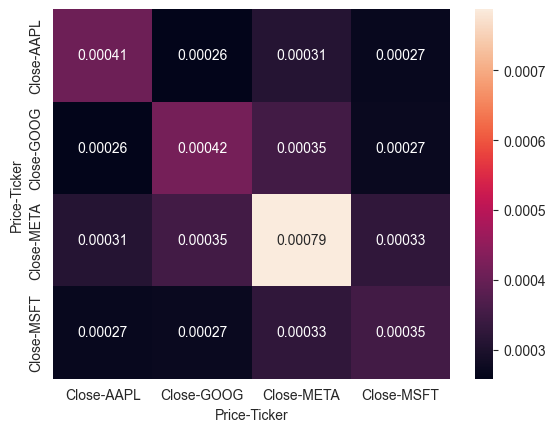

In [249]:
sns.heatmap(sigma_matrix, annot=True)

<Axes: xlabel='Price-Ticker', ylabel='Price-Ticker'>

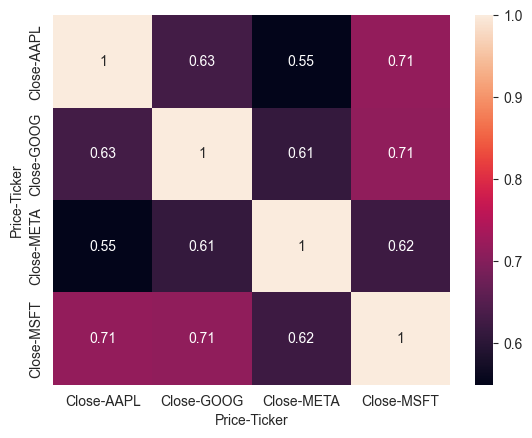

In [250]:
sns.heatmap(log_returns.corr(), annot=True)

In [251]:
ones = np.ones((len(lin_returns.columns),1))
ones

array([[1.],
       [1.],
       [1.],
       [1.]])

In [252]:
minimum_variance_weights = (np.linalg.inv(sigma_matrix) @ ones) / (ones.T @ np.linalg.inv(sigma_matrix) @ ones)

In [277]:
minimum_variance_portfolio =  lin_returns @ minimum_variance_weights
minimum_variance_portfolio

,0
Date,
2020-01-03,-0.009835
2020-01-06,0.009708
2020-01-07,-0.005939
2020-01-08,0.013954
2020-01-09,0.014578
...,...
2025-11-10,0.020066
2025-11-11,0.010398
2025-11-12,-0.002444


In [254]:
minimum_variance_portfolio.describe()

,0
count,1476.000000
mean,0.001043
std,0.017469
min,-0.131600
25%,-0.007394
50%,0.001633
75%,0.010261
max,0.123703


In [255]:
minimum_variance_portfolio.mean() / minimum_variance_portfolio.std()

0    0.059681
dtype: float64

In [256]:
portfolio_returns_marketCap_weights.mean() / portfolio_returns_marketCap_weights.std()

Market-weighted Portfolio Returns    0.059743
dtype: float64

In [257]:
import matplotlib.pyplot as plt

In [258]:
cumulative_returns_minimum_variance = (1 + minimum_variance_portfolio).cumprod()
cumulative_returns_minimum_variance.iloc[0]=1

In [259]:
cumulative_returns_minimum_variance.describe()

,0
count,1476.000000
mean,2.090706
std,0.629508
min,0.803702
25%,1.662640
50%,2.039659
75%,2.567479
max,3.774484


In [260]:
cumulative_returns_market_weighted_portfolio.describe()

,Market-weighted Portfolio Returns
count,1476.000000
mean,2.082411
std,0.707189
min,0.779344
25%,1.538653
50%,1.953065
75%,2.660500
max,3.957251


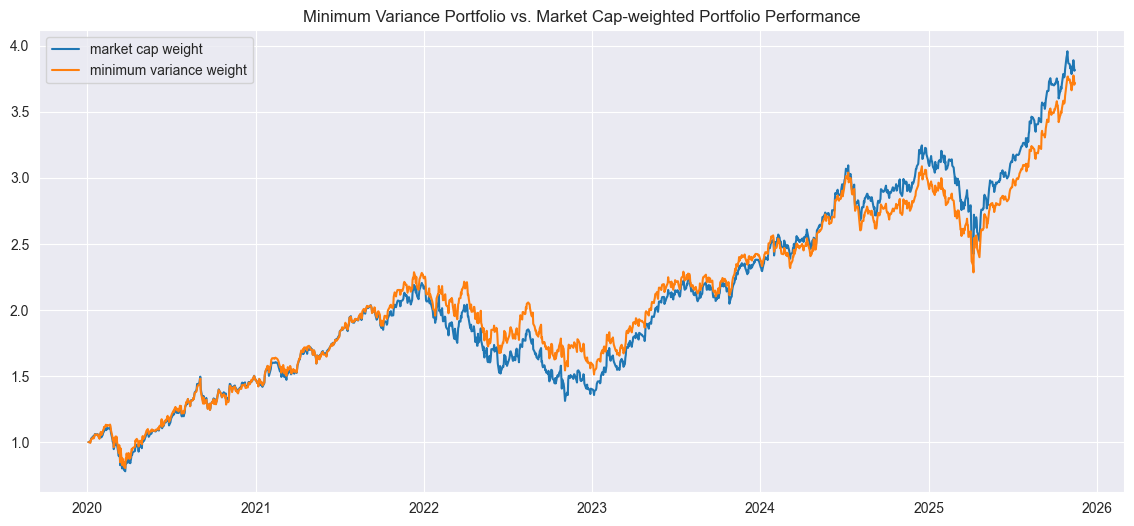

In [261]:
plt.figure(figsize=(14, 6))
plt.title("Minimum Variance Portfolio vs. Market Cap-weighted Portfolio Performance")
plt.plot(cumulative_returns_market_weighted_portfolio, label=["market cap weight"])
plt.plot(cumulative_returns_minimum_variance, label="minimum variance weight")
plt.legend()
plt.show()

In [262]:
from scipy.optimize import minimize

In [263]:
from scipy.optimize import root

In [264]:
weights = pd.DataFrame(np.random.rand( len(stocks.columns)) , index=stocks.columns, columns=["weights"])
weights["weights"] = weights["weights"]/weights["weights"].sum()
weights

weights
Price Ticker          
Close AAPL    0.113070
      GOOG    0.160551
      META    0.550244
      MSFT    0.176135

In [265]:
lin_returns

Price          Close                              
Ticker          AAPL      GOOG      META      MSFT
Date                                              
2020-01-03 -0.009722 -0.004907 -0.005291 -0.012452
2020-01-06  0.007968  0.024657  0.018834  0.002585
2020-01-07 -0.004703 -0.000624  0.002164 -0.009118
2020-01-08  0.016086  0.007880  0.010138  0.015928
2020-01-09  0.021241  0.011044  0.014311  0.012493
...              ...       ...       ...       ...
2025-11-10  0.003576  0.038935  0.016165  0.018478
2025-11-11  0.021601  0.003957 -0.007408  0.005296
2025-11-12 -0.006467 -0.014773 -0.028816  0.004836
2025-11-13 -0.001901 -0.028911  0.001445 -0.015358
2025-11-14 -0.001978 -0.007667 -0.000705  0.013690

[1476 rows x 4 columns]

In [266]:
len(lin_returns.columns)

4

In [267]:
def sharpe_ratio_negative(w):
    return -(lin_returns @ w.T).mean() / (lin_returns @ w.T).std()

In [268]:
bounds = [(0,1)]
cons = {'type': 'eq', 'fun': lambda w: np.sum(w) - 1}

x0 = np.ones(len(stocks.columns))/len(stocks.columns)

sol = minimize(sharpe_ratio_negative, x0 , bounds=bounds, constraints=cons, method='SLSQP')
print(sol.x)

[0.35048482 0.50573882 0.         0.14377636]


In [269]:
tangency_portfolio = lin_returns @ sol.x.T

In [270]:
cumulative_returns_tangency_portfolio = (1 + tangency_portfolio).cumprod()
cumulative_returns_tangency_portfolio.iloc[0]=1
cumulative_returns_tangency_portfolio.describe()

count    1476.000000
mean        2.087198
std         0.663301
min         0.775552
25%         1.638081
50%         2.049438
75%         2.588770
max         4.115133
dtype: float64

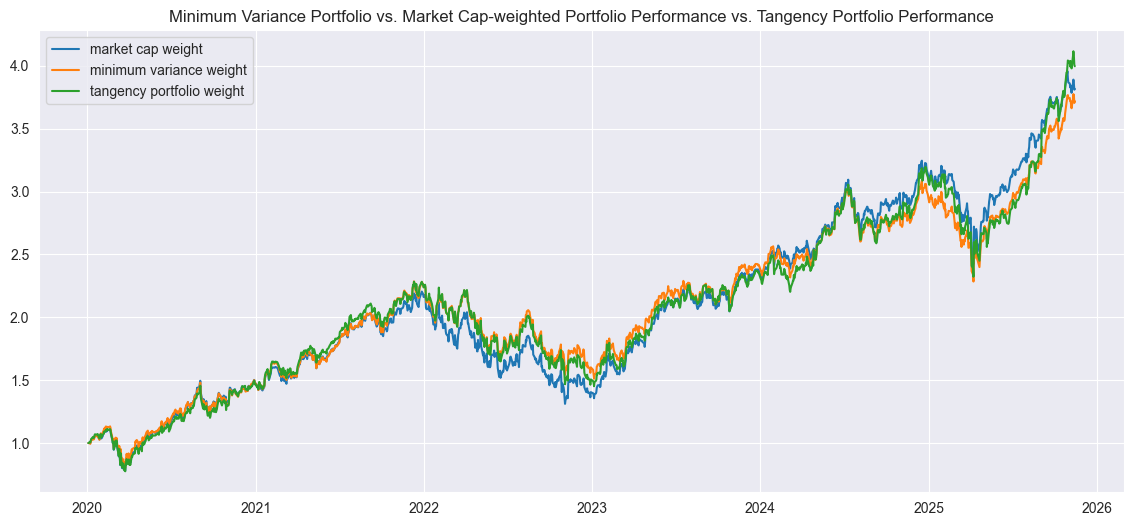

In [271]:
plt.figure(figsize=(14, 6))
plt.title("Minimum Variance Portfolio vs. Market Cap-weighted Portfolio Performance vs. Tangency Portfolio Performance")
plt.plot(cumulative_returns_market_weighted_portfolio, label=["market cap weight"])
plt.plot(cumulative_returns_minimum_variance, label="minimum variance weight")
plt.plot(cumulative_returns_tangency_portfolio, label="tangency portfolio weight")
plt.legend()
plt.show()

In [279]:
tangency_portfolio = pd.DataFrame(tangency_portfolio, columns = ["Tangency Portfolio Returns"])
minimum_variance_portfolio.columns = ["Minimum Variance Portfolio Returns"]
portfolios = pd.concat([tangency_portfolio, portfolio_returns_marketCap_weights, minimum_variance_portfolio], axis=1)
portfolios.describe()

,Tangency Portfolio Returns,Market-weighted Portfolio Returns,Minimum Variance Portfolio Returns
count,1476.000000,1476.000000,1476.000000
mean,0.001100,0.001067,0.001043
std,0.017939,0.017858,0.017469
min,-0.122421,-0.131245,-0.131600
25%,-0.007579,-0.007186,-0.007394
50%,0.002005,0.001329,0.001633
75%,0.010636,0.010431,0.010261
max,0.118255,0.122709,0.123703


In [280]:
sharpe_ratios = portfolios.describe().loc["mean"]/portfolios.describe().loc["std"]
sharpe_ratios = pd.DataFrame(sharpe_ratios, columns =["Sharpe Ratio"])
sharpe_ratios

,Sharpe Ratio
Tangency Portfolio Returns,0.061308
Market-weighted Portfolio Returns,0.059743
Minimum Variance Portfolio Returns,0.059681


Backtesting
Goal: Evaluate strategy performance over time.

Simulate monthly rebalancing of portfolios (equal-weighted and optimized).

Record metrics over time (returns, volatility, Sharpe, drawdown).

Compare the performance of different strategies.



Function Modularization
Goal: Turn repeated operations into reusable code.

Write functions for:

Portfolio return computation

Sharpe, Sortino, and drawdown

VaR and CVaR

Optimization and efficient frontier

Keep your notebook clean and organized.

Visualization and Reporting
Goal: Present your findings clearly.

Plot cumulative returns, rolling Sharpe, and drawdowns.

Display VaR/CVaR distributions and efficient frontier.

Summarize metrics in a clean DataFrame or table.